In [ ]:
# default_exp model

# Model
> Model class to store pytorch model.

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# export
import torch
import torch.nn as nn

from functools import partial
from fastai import *
from fastai.basic_train import Learner

from keraTorch.data import create_db
from keraTorch.layers import *
from keraTorch.losses import *

from IPython.display import clear_output

In [ ]:
# export
class Sequential:
    def __init__(self, model=None):
        self.layers = []
        self.last_dim = None
        self.model = model
        
    def add(self, layer):
        layer = layer.get_layer(self.last_dim)
        self.last_dim = layer['output_dim']
        self.layers.extend(layer['layers'])
        
    def compile(self, loss, optimizer=None):
        if len(self.layers) > 0:
            self.model = nn.Sequential(*self.layers)
        self.loss = loss
        
    def fit(self, x, y, bs, epochs, lr=1e-3, one_cycle=True, get_lr=True):
        db = create_db(x, y, bs=bs)
        self.learn = Learner(db, self.model, loss_func=self.loss)
        if one_cycle:
            self.learn.fit_one_cycle(epochs, lr)
        else:
            self.learn.fit(epochs, lr)
               
    def lr_find(self, x, y, bs):
        db = create_db(x, y, bs=bs)
#         breakpoint()
        learn = Learner(db, self.model, loss_func=self.loss)
        learn.lr_find()
        clear_output()
        learn.recorder.plot(suggestion=True)
        
    def predict(self, x):
        self.learn.model.eval()
        with torch.no_grad():
            y_preds = self.learn.model(torch.Tensor(x))
        return y_preds.cpu().numpy()

In [ ]:
# hide
!wget -O iris.csv http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
import pandas as pd
data = pd.read_csv('./iris.csv', header=None)
data[4] = data[4].astype('category').cat.codes
!rm iris.csv
x = data.drop(4, axis=1).values
y = data[4].values
x.shape, y.shape, x.dtype, y.dtype

--2020-04-16 11:36:51--  http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.44K  --.-KB/s    in 0s      

2020-04-16 11:36:51 (49.9 MB/s) - ‘iris.csv’ saved [4551/4551]



((150, 4), (150,), dtype('float64'), dtype('int8'))

In [ ]:
model = Sequential()
model.add(Dense(2, x.shape[1], activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(len(set(y))))
model.add(Activation('softmax'))

model.compile(ce4softmax)

Min numerical gradient: 4.79E-02
Min loss divided by 10: 3.31E-01


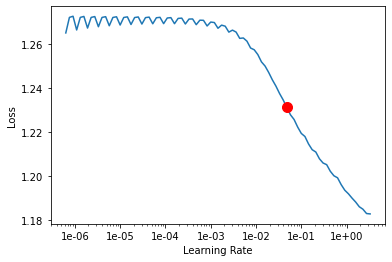

In [ ]:
bs = 50
model.lr_find(x, y, bs=bs)

In [ ]:
model.fit(x, y, bs, epochs=3, lr=1e-1)

epoch,train_loss,valid_loss,time
0,1.190006,1.135400,00:00
1,1.152998,1.137829,00:00
2,1.140507,1.149526,00:00


In [ ]:
preds = model.predict(x[:2])
preds

array([[0.252873, 0.415113, 0.332014],
       [0.260588, 0.400858, 0.338554]], dtype=float32)

As can be seen the sum of the probabilities are 1.

In [ ]:
preds.sum(axis=-1, keepdims=True)

array([[1.],
       [1.]], dtype=float32)

In [ ]:
# hide
from nbdev.export import *
notebook2script()

Converted Activations.ipynb.
Converted Layers.ipynb.
Converted Model.ipynb.
Converted cifar.ipynb.
Converted data.ipynb.
Converted index.ipynb.
Converted losses.ipynb.
